In [20]:
# Librerías 

import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.corpus import subjectivity
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from gensim.models.fasttext import FastTextKeyedVectors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from wordcloud import WordCloud
from unidecode import unidecode
import re

# a)

In [3]:
# Función para procesar texto
def procesaTexto(texto, stop_words): 

    #doc = nlp(texto)
    #texto = ' '.join([token.lemma_ for token in doc])

    # Convertir a minúsculas, quitar tildes, simbolos de acentuación y números
    texto = re.sub(r'[^\w\s]', '', texto.lower()) 
    texto = re.sub(r'\d+', '', texto)

    # Tokenización
    tokens = word_tokenize(texto)

    # Eliminar stopwords
    #stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token not in stop_words]

    # Convertir tokens a texto nuevamente
    texto_preprocesado = ' '.join(tokens)
    
    texto_preprocesado = re.sub(r'[^\w\s]', '', unidecode(texto_preprocesado.lower()))
    
    return texto_preprocesado

In [4]:
# Se importa nueva lista de stop words
stop_words = []

with open('spanish.txt', 'r', encoding='utf-8') as archivo:
    for palabra in archivo:
        stop_words.append(palabra.strip())

In [ ]:
# Se importa el repositorio y se crea el corpus
base = 'conferencias_matutinas_amlo-master/conferencias_matutinas_amlo-master'

base_final = 'csv_por_participante/PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR.csv'
anos = ['2019','2020', '2021', '2022', '2023']
meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
meses_num = ['1','2','3','4','5','6','7','8','9','10','11','12']
dias = [str(i) for i in range(1, 32)]
direcciones = []

for ano in anos:
    for mn in meses_num:
        for mes in meses:
            for dia in dias: 
                dir = base + '/' + ano + '/' + mn  + '-' + ano + '/' + mes + ' ' + dia + ', ' + ano + '/' + base_final 
                direcciones.append(dir)

# Corpus
corpus = []
for i in direcciones:
    try:
        datos = pd.read_csv(i)
        texto = datos['Texto'].str.cat(sep=' ')
        corpus.append(texto)
    except FileNotFoundError:
        pass
        

# Corpus procesado 
corpus_ = []
for documento in corpus:
    corpus_.append(procesaTexto(documento, stop_words))

In [6]:
# Se determina el número de tópicos a considerar

# Matriz TF-IDF
max_words = 500
vectorizer = TfidfVectorizer(lowercase=False, ngram_range= (1,1), max_features=max_words)
X = vectorizer.fit_transform(corpus_)
tf_idf = X.toarray()
tf_idf_df = pd.DataFrame(tf_idf,columns=vectorizer.get_feature_names_out())
tf_idf_df

abajo       aca  acciones    acerca    actuar   acuerdo  acuerdos  \
0     0.000000  0.000000  0.000000  0.104075  0.051276  0.000000  0.000000   
1     0.029046  0.000000  0.000000  0.055167  0.027180  0.018731  0.000000   
2     0.000000  0.028623  0.028078  0.000000  0.022857  0.063010  0.000000   
3     0.000000  0.000000  0.025492  0.105305  0.062258  0.028604  0.000000   
4     0.055219  0.064704  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1201  0.110769  0.000000  0.031831  0.052595  0.025913  0.125006  0.064205   
1202  0.008312  0.000000  0.038216  0.000000  0.015555  0.064322  0.000000   
1203  0.000000  0.134892  0.026465  0.000000  0.043088  0.044542  0.000000   
1204  0.074736  0.029191  0.014318  0.011829  0.000000  0.048196  0.028880   
1205  0.000000  0.038749  0.038011  0.000000  0.030943  0.063976  0.019168   

       adultos  adversarios  aeropuerto  ...     vemos       ven  veracruz  \
0     0.000000     0.026310    0.000000  ...  0.022374  0.000000  0.000000   
1     0.031798     0.027893    0.000000  ...  0.094877  0.030489  0.000000   
2     0.000000     0.023457    0.000000  ...  0.039895  0.000000  0.000000   
3     0.048558     0.042594    0.000000  ...  0.000000  0.023279  0.000000   
4     0.000000     0.053026    0.060389  ...  0.045092  0.000000  0.000000   
...        ...          ...         ...  ...       ...       ...       ...   
1201  0.030316     0.079777    0.000000  ...  0.000000  0.029068  0.000000   
1202  0.000000     0.007982    0.154532  ...  0.006787  0.000000  0.039254   
1203  0.025205     0.022109    0.050359  ...  0.018801  0.024167  0.000000   
1204  0.027272     0.047845    0.122601  ...  0.061030  0.052299  0.014706   
1205  0.000000     0.031755    0.000000  ...  0.013502  0.052067  0.000000   

           via      vida    viendo     viene    vienen  violencia      zona  
0     0.000000  0.056182  0.022393  0.000000  0.029722   0.074500  0.032884  
1     0.000000  0.059561  0.000000  0.000000  0.000000   0.184287  0.000000  
2     0.000000  0.050089  0.019965  0.020333  0.026499   0.044280  0.000000  
3     0.059544  0.030318  0.000000  0.000000  0.000000   0.020101  0.000000  
4     0.000000  0.000000  0.090262  0.000000  0.000000   0.000000  0.000000  
...        ...       ...       ...       ...       ...        ...       ...  
1201  0.000000  0.094640  0.090532  0.000000  0.000000   0.000000  0.000000  
1202  0.022316  0.028406  0.054347  0.020756  0.009017   0.015067  0.009976  
1203  0.000000  0.141633  0.037635  0.019164  0.000000   0.083472  0.000000  
1204  0.000000  0.042570  0.000000  0.010368  0.000000   0.000000  0.000000  
1205  0.044392  0.022603  0.013514  0.027525  0.089682   0.059945  0.119066  

[1206 rows x 500 columns]

# b) 

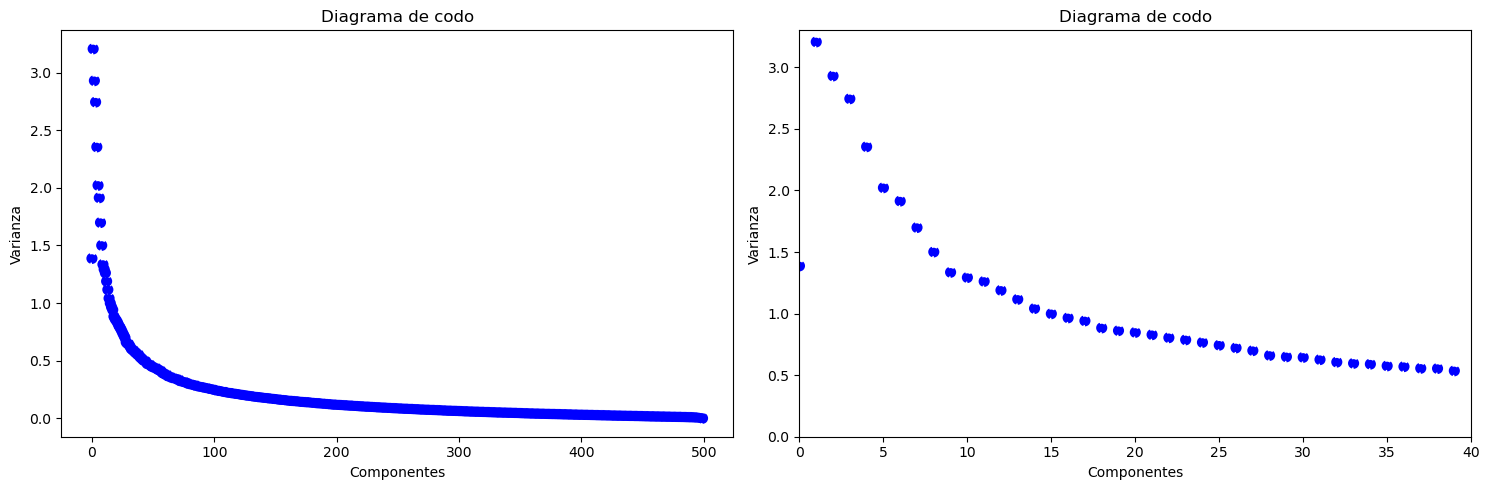

In [7]:
# Descomposición SVD

svd = TruncatedSVD(n_components=500)  # Define el número de componentes (tópicos) k
documento_topico = svd.fit_transform(tf_idf_df)

# Calcular la suma total de la varianza explicada
total_variance = sum(svd.explained_variance_)

# Calcular el porcentaje de varianza explicada por cada componente
explained_variance_ratio = (svd.explained_variance_ / total_variance) * 100


# Crear una figura y ejes de subgráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(range(len(explained_variance_ratio)), explained_variance_ratio, marker='o', linestyle='--', color='b', linewidth=2)
axs[0].set_title('Diagrama de codo')
axs[0].set_xlabel('Componentes')
axs[0].set_ylabel('Varianza')

axs[1].scatter(range(40), explained_variance_ratio[0:40], marker='o', linestyle='--', color='b', linewidth=2)
axs[1].set_title('Diagrama de codo')
axs[1].set_xlabel('Componentes')
axs[1].set_ylabel('Varianza')
# Definir los límites en X e Y
plt.xlim(0, 40)  # Límites en el eje X
plt.ylim(0, 3.3)  # Límites en el eje 

# Mostrar la figura
plt.tight_layout()
plt.show()

In [8]:
# Matriz TF-IDF con 8 tópicos
max_words = 500
vectorizer = TfidfVectorizer(lowercase=False, ngram_range= (1,1), max_features=max_words)
X = vectorizer.fit_transform(corpus_)
tf_idf = X.toarray()
tf_idf_df = pd.DataFrame(tf_idf,columns=vectorizer.get_feature_names_out())

svd = TruncatedSVD(n_components=8)  # Define el número de componentes (tópicos) k
documento_topico = svd.fit_transform(tf_idf_df)
indice_maximo = np.argmax(documento_topico, axis=1) + 1

# Obtener los términos
terms = vectorizer.get_feature_names_out()

# Obtener los tópicos y sus importancias
topics = pd.DataFrame(svd.components_, columns=terms)

tf_idf_df

abajo       aca  acciones    acerca    actuar   acuerdo  acuerdos  \
0     0.000000  0.000000  0.000000  0.104075  0.051276  0.000000  0.000000   
1     0.029046  0.000000  0.000000  0.055167  0.027180  0.018731  0.000000   
2     0.000000  0.028623  0.028078  0.000000  0.022857  0.063010  0.000000   
3     0.000000  0.000000  0.025492  0.105305  0.062258  0.028604  0.000000   
4     0.055219  0.064704  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1201  0.110769  0.000000  0.031831  0.052595  0.025913  0.125006  0.064205   
1202  0.008312  0.000000  0.038216  0.000000  0.015555  0.064322  0.000000   
1203  0.000000  0.134892  0.026465  0.000000  0.043088  0.044542  0.000000   
1204  0.074736  0.029191  0.014318  0.011829  0.000000  0.048196  0.028880   
1205  0.000000  0.038749  0.038011  0.000000  0.030943  0.063976  0.019168   

       adultos  adversarios  aeropuerto  ...     vemos       ven  veracruz  \
0     0.000000     0.026310    0.000000  ...  0.022374  0.000000  0.000000   
1     0.031798     0.027893    0.000000  ...  0.094877  0.030489  0.000000   
2     0.000000     0.023457    0.000000  ...  0.039895  0.000000  0.000000   
3     0.048558     0.042594    0.000000  ...  0.000000  0.023279  0.000000   
4     0.000000     0.053026    0.060389  ...  0.045092  0.000000  0.000000   
...        ...          ...         ...  ...       ...       ...       ...   
1201  0.030316     0.079777    0.000000  ...  0.000000  0.029068  0.000000   
1202  0.000000     0.007982    0.154532  ...  0.006787  0.000000  0.039254   
1203  0.025205     0.022109    0.050359  ...  0.018801  0.024167  0.000000   
1204  0.027272     0.047845    0.122601  ...  0.061030  0.052299  0.014706   
1205  0.000000     0.031755    0.000000  ...  0.013502  0.052067  0.000000   

           via      vida    viendo     viene    vienen  violencia      zona  
0     0.000000  0.056182  0.022393  0.000000  0.029722   0.074500  0.032884  
1     0.000000  0.059561  0.000000  0.000000  0.000000   0.184287  0.000000  
2     0.000000  0.050089  0.019965  0.020333  0.026499   0.044280  0.000000  
3     0.059544  0.030318  0.000000  0.000000  0.000000   0.020101  0.000000  
4     0.000000  0.000000  0.090262  0.000000  0.000000   0.000000  0.000000  
...        ...       ...       ...       ...       ...        ...       ...  
1201  0.000000  0.094640  0.090532  0.000000  0.000000   0.000000  0.000000  
1202  0.022316  0.028406  0.054347  0.020756  0.009017   0.015067  0.009976  
1203  0.000000  0.141633  0.037635  0.019164  0.000000   0.083472  0.000000  
1204  0.000000  0.042570  0.000000  0.010368  0.000000   0.000000  0.000000  
1205  0.044392  0.022603  0.013514  0.027525  0.089682   0.059945  0.119066  

[1206 rows x 500 columns]

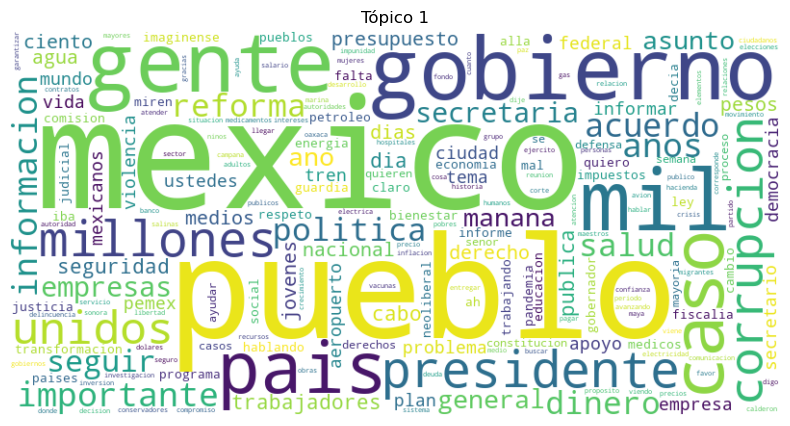

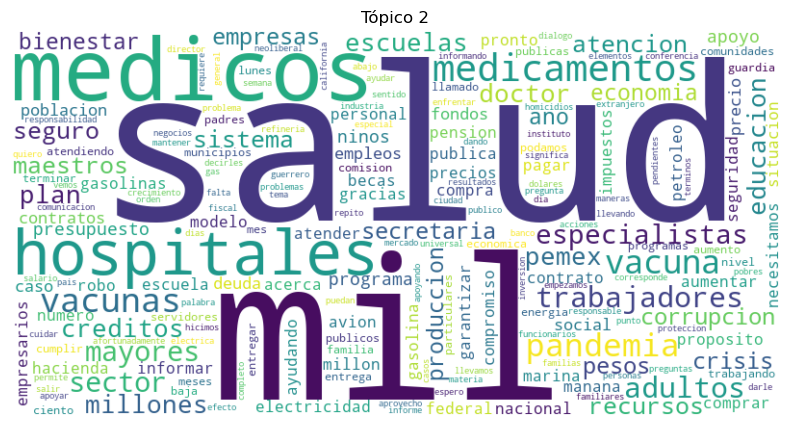

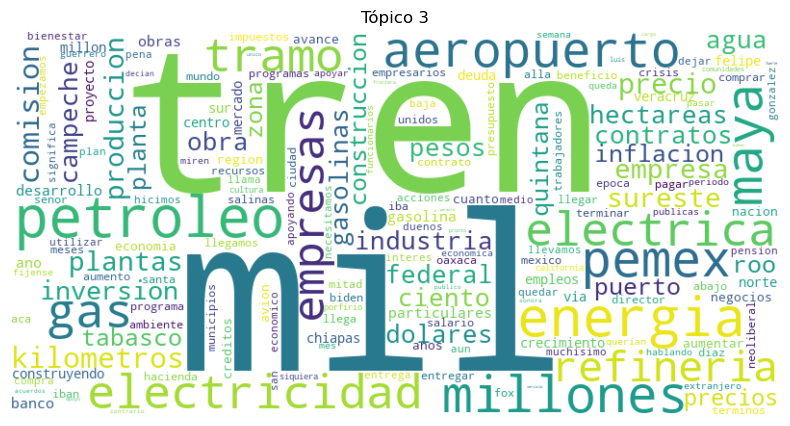

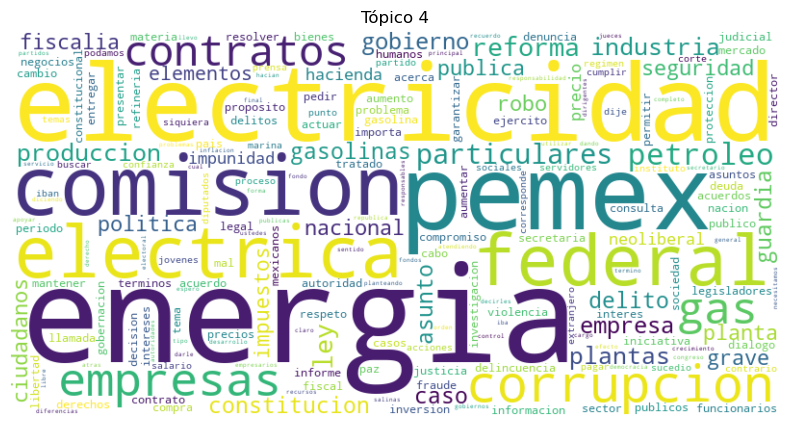

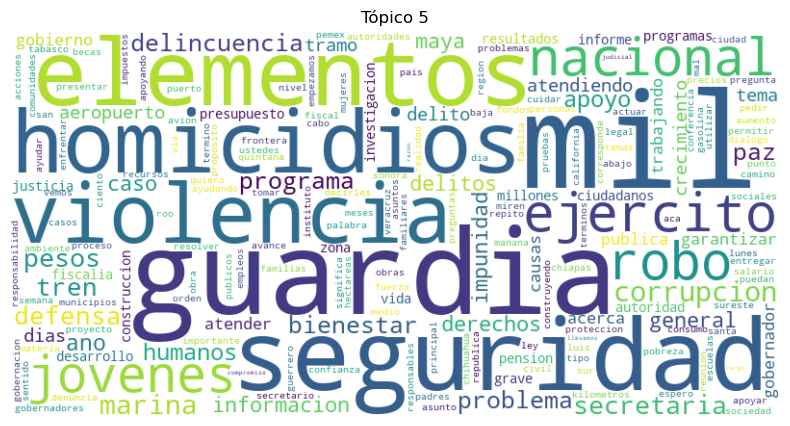

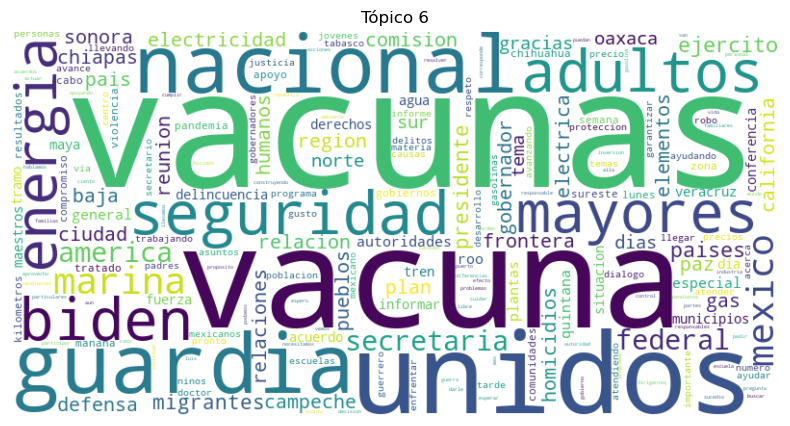

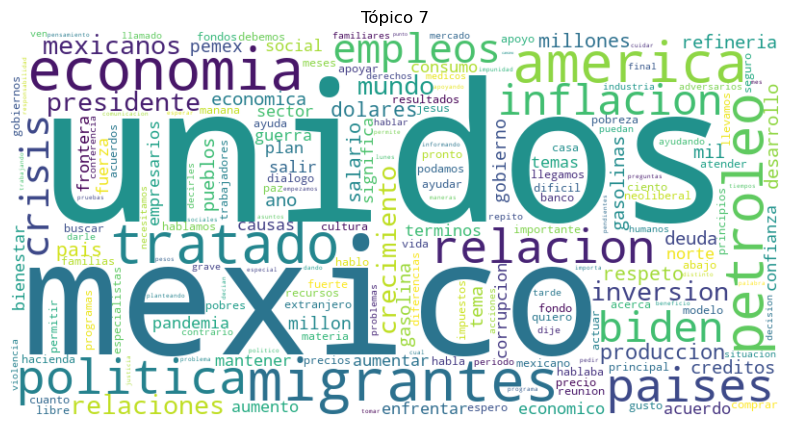

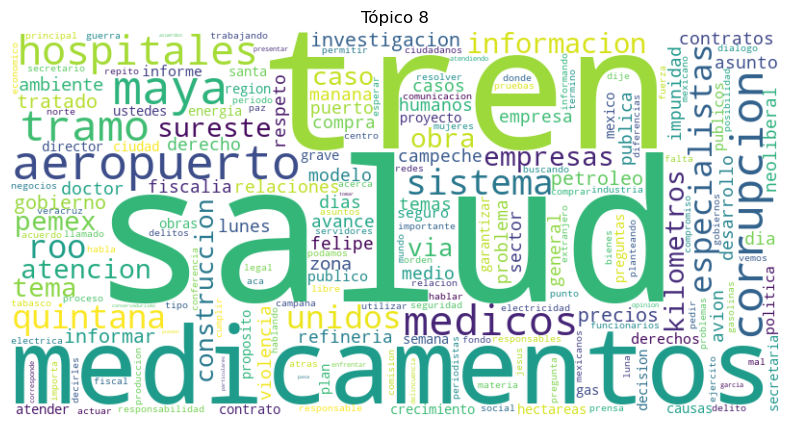

In [53]:
# WorldCloud 

k=8
for i in range(k):
    topic_weights = dict(zip(terms, topics.iloc[i]))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_weights)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Tópico {}'.format(i+1))
    plt.axis('off')
    plt.show()

# c)

In [48]:
# Reducción de dimensiones 

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
documento_topico_pca = pca.fit_transform(documento_topico)

# Reducción de dimensionalidad con Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
documento_topico_kernel_pca = kernel_pca.fit_transform(documento_topico)

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2)
documento_topico_tsne = tsne.fit_transform(documento_topico)

C:\Users\a-sal\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\a-sal\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


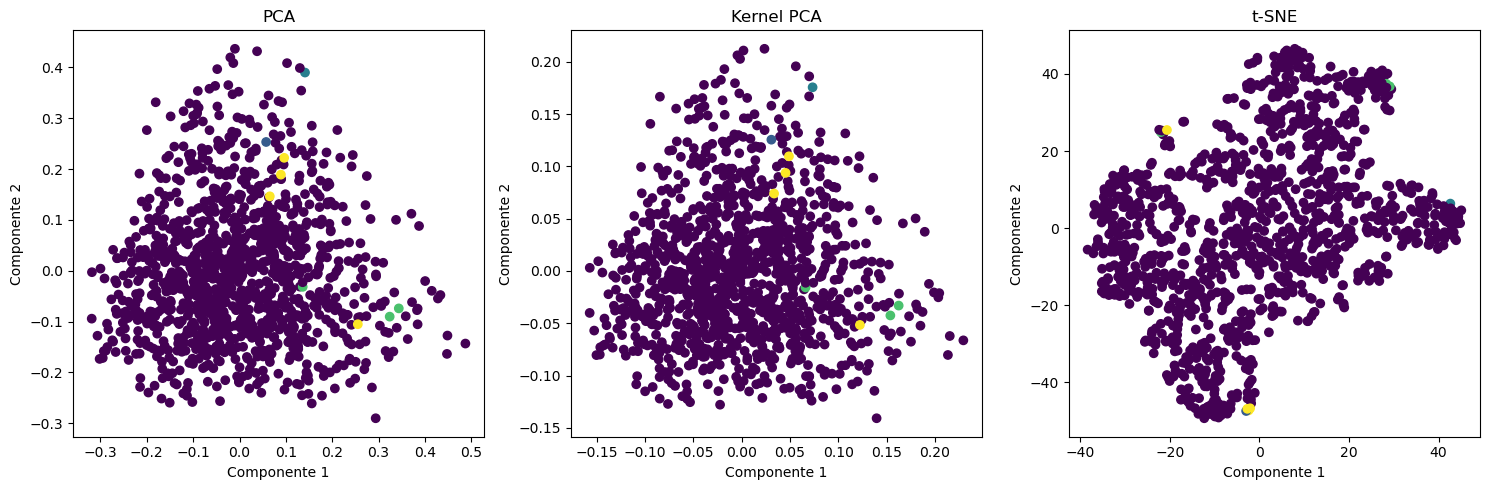

In [49]:
# Crear una figura y ejes de subgráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Graficar PCA
axs[0].scatter(documento_topico_pca[:, 0], documento_topico_pca[:, 1], c=indice_maximo, cmap='viridis')
axs[0].set_title('PCA')
axs[0].set_xlabel('Componente 1')
axs[0].set_ylabel('Componente 2')

# Graficar Kernel PCA
axs[1].scatter(documento_topico_kernel_pca[:, 0], documento_topico_kernel_pca[:, 1], c=indice_maximo, cmap='viridis')
axs[1].set_title('Kernel PCA')
axs[1].set_xlabel('Componente 1')
axs[1].set_ylabel('Componente 2')

# Graficar t-SNE
axs[2].scatter(documento_topico_tsne[:, 0], documento_topico_tsne[:, 1], c=indice_maximo, cmap='viridis')
axs[2].set_title('t-SNE')
axs[2].set_xlabel('Componente 1')
axs[2].set_ylabel('Componente 2')

# Mostrar la figura
plt.tight_layout()
plt.show()

# d)

In [54]:
# Factorización NMF

nmf = NMF(n_components=8)
documento_topico_nmf = nmf.fit_transform(tf_idf_df)
indice_maximo_nmf = np.argmax(documento_topico_nmf, axis=1)

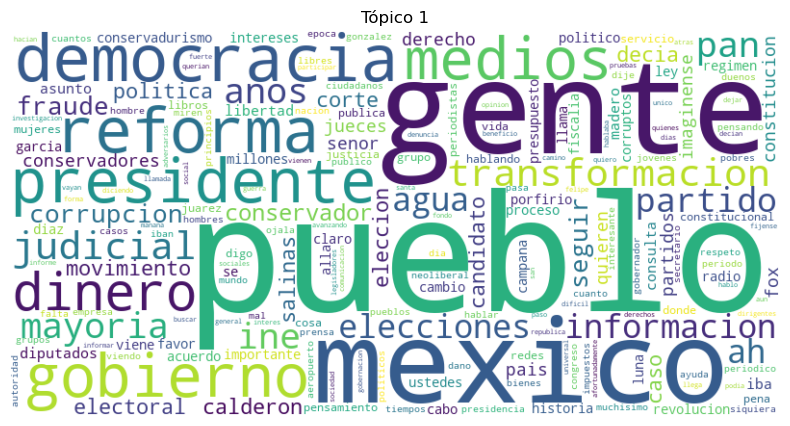

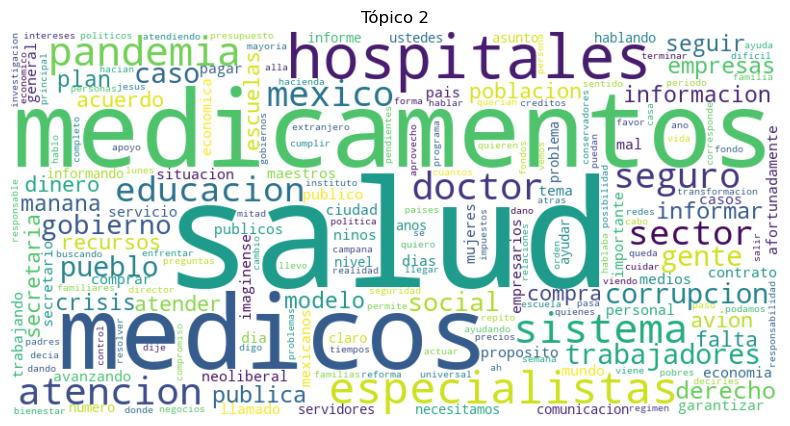

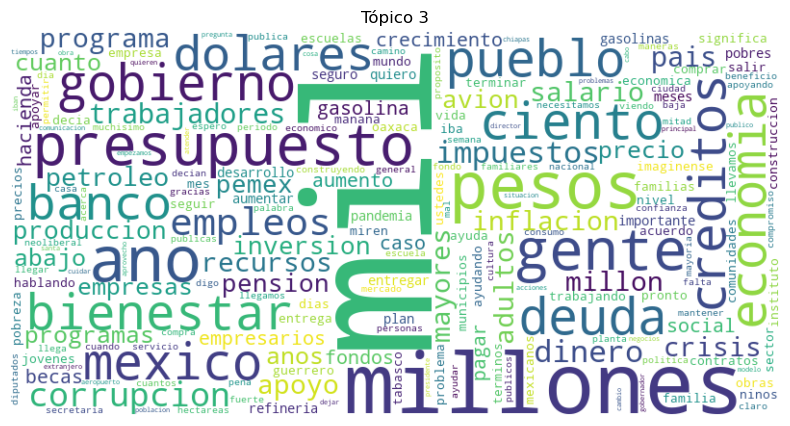

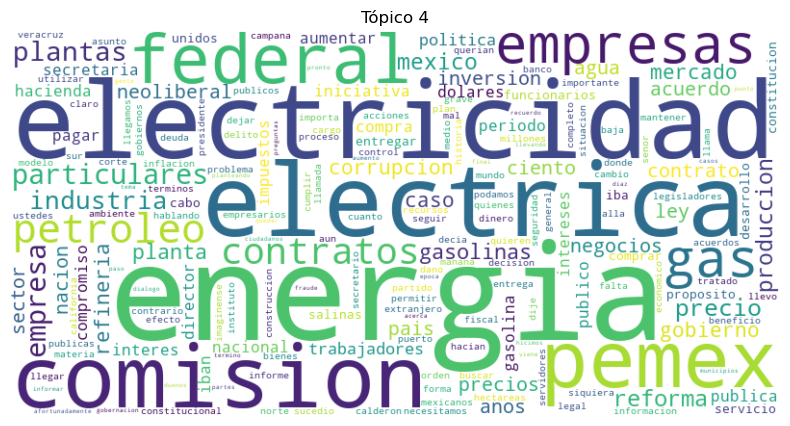

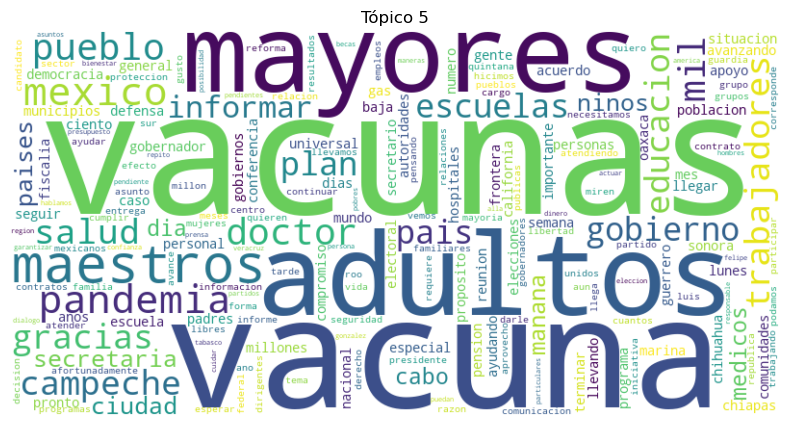

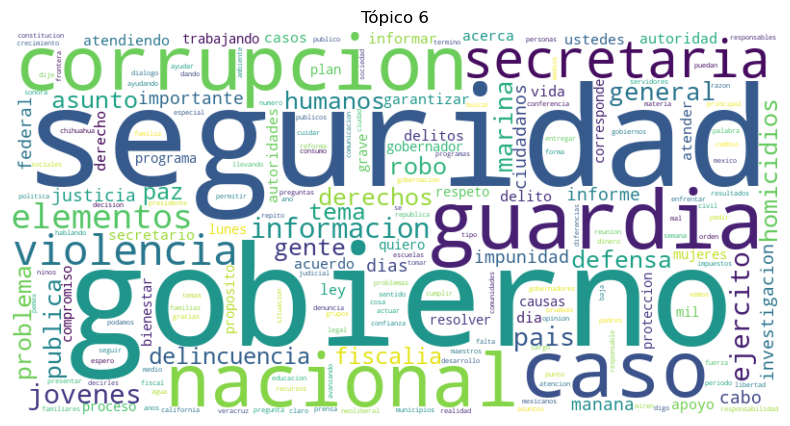

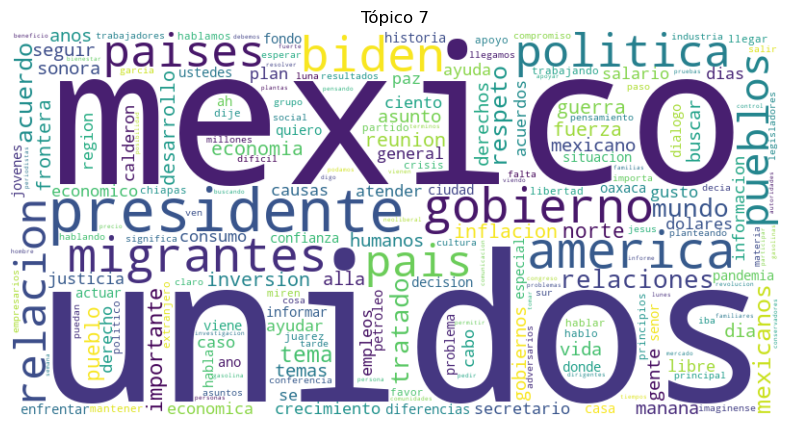

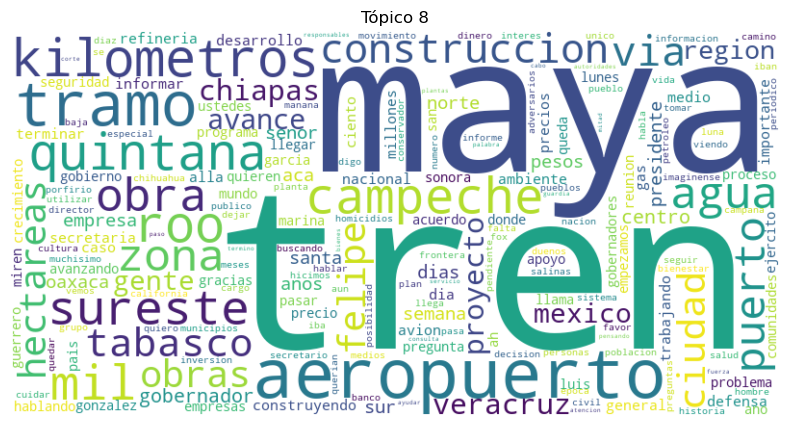

In [55]:
# Obtener los términos
terms_nmf = vectorizer.get_feature_names_out()

# Obtener los tópicos y sus importancias
topics_nmf = pd.DataFrame(nmf.components_, columns=terms_nmf)

k=8
for i in range(k):
    topic_weights = dict(zip(terms_nmf, topics_nmf.iloc[i]))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_weights)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Tópico {}'.format(i+1))
    plt.axis('off')
    plt.show()

In [56]:
# Reducción de dimensiones 

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
documento_topico_pca = pca.fit_transform(documento_topico_nmf)

# Reducción de dimensionalidad con Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
documento_topico_kernel_pca = kernel_pca.fit_transform(documento_topico_nmf)

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2)
documento_topico_tsne = tsne.fit_transform(documento_topico_nmf)

C:\Users\a-sal\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\a-sal\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


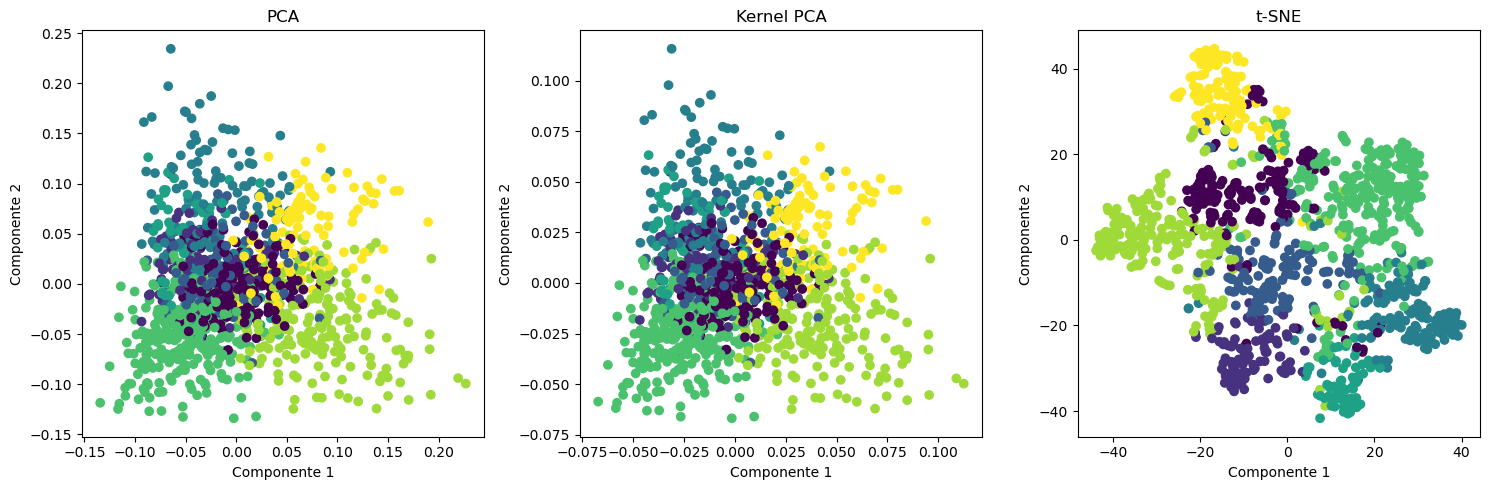

In [57]:
# Crear una figura y ejes de subgráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Graficar PCA
axs[0].scatter(documento_topico_pca[:, 0], documento_topico_pca[:, 1], c=indice_maximo_nmf, cmap='viridis')
axs[0].set_title('PCA')
axs[0].set_xlabel('Componente 1')
axs[0].set_ylabel('Componente 2')

# Graficar Kernel PCA
axs[1].scatter(documento_topico_kernel_pca[:, 0], documento_topico_kernel_pca[:, 1], c=indice_maximo_nmf, cmap='viridis')
axs[1].set_title('Kernel PCA')
axs[1].set_xlabel('Componente 1')
axs[1].set_ylabel('Componente 2')

# Graficar t-SNE
axs[2].scatter(documento_topico_tsne[:, 0], documento_topico_tsne[:, 1], c=indice_maximo_nmf, cmap='viridis')
axs[2].set_title('t-SNE')
axs[2].set_xlabel('Componente 1')
axs[2].set_ylabel('Componente 2')

# Mostrar la figura
plt.tight_layout()
plt.show()

# e)

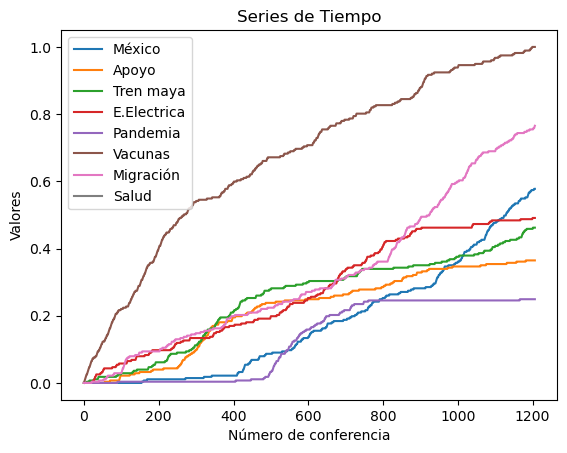

In [60]:
serie1 = [0]
serie2 = [0]
serie3 = [0]
serie4 = [0]
serie5 = [0]
serie6 = [0]
serie7 = [0]
serie8 = [0]

for i in range(len(indice_maximo_nmf)):
    
    serie1.append(serie1[-1])
    serie2.append(serie2[-1])
    serie3.append(serie3[-1])
    serie4.append(serie4[-1])
    serie5.append(serie5[-1])
    serie6.append(serie6[-1])
    serie7.append(serie7[-1])
    
    if indice_maximo_nmf[i] == 0:
        serie1[-1] = serie1[-1] + 1
    elif indice_maximo_nmf[i] == 1:
        serie2[-1] = serie2[-1] + 1
    elif indice_maximo_nmf[i] == 2:
        serie3[-1] = serie3[-1] + 1
    elif indice_maximo_nmf[i] == 3:
        serie4[-1] = serie4[-1] + 1
    elif indice_maximo_nmf[i] == 4:
        serie5[-1] = serie5[-1] + 1
    elif indice_maximo_nmf[i] == 5:
        serie6[-1] = serie6[-1] + 1
    elif indice_maximo_nmf[i] == 6:
        serie7[-1] = serie7[-1] + 1
    else:
        serie8[-1] = serie8[-1] + 1
        

maximo = max([max(serie1), max(serie2), max(serie3), max(serie4), max(serie5), max(serie6), max(serie7), max(serie8)])

serie1 = np.array(serie1) / maximo
serie2 = np.array(serie2) / maximo
serie3 = np.array(serie3) / maximo
serie4 = np.array(serie4) / maximo
serie5 = np.array(serie5) / maximo
serie6 = np.array(serie6) / maximo
serie7 = np.array(serie7) / maximo
serie8 = np.array(serie8) / maximo


# Graficar las series de tiempo
plt.plot(serie1, label='México')
plt.plot(serie2, label='Apoyo')
plt.plot(serie3, label='Tren maya')
plt.plot(serie4, label='E.Electrica')
plt.plot(serie5, label='Pandemia')
plt.plot(serie6, label='Vacunas')
plt.plot(serie7, label='Migración')
plt.plot(serie8, label='Salud')

# Añadir etiquetas y título
plt.xlabel('Número de conferencia')
plt.ylabel('Valores')
plt.title('Series de Tiempo')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()